In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [2]:
#数据预处理，不含归一化
C = 2  # 类别数量
df_wine_white = pd.read_csv(r'data/winequality-white.csv', header=0, sep=',')
df_wine_white.insert(12,'label',int(0))
df_wine_red = pd.read_csv(r'data/winequality-red.csv', header=0, sep=',')
df_wine_red.insert(12,'label',int(1))
df_wine = pd.concat((df_wine_red,df_wine_white),axis = 0,join = 'outer')
df_wine = df_wine.to_numpy()
# 设置随机种子
np.random.seed(42)
np.random.shuffle(df_wine)
X = df_wine[:, :-1]
X = np.array(X)
y = df_wine[:, -1]
#print(X.shape)

                                       Correlation Matrix                                       


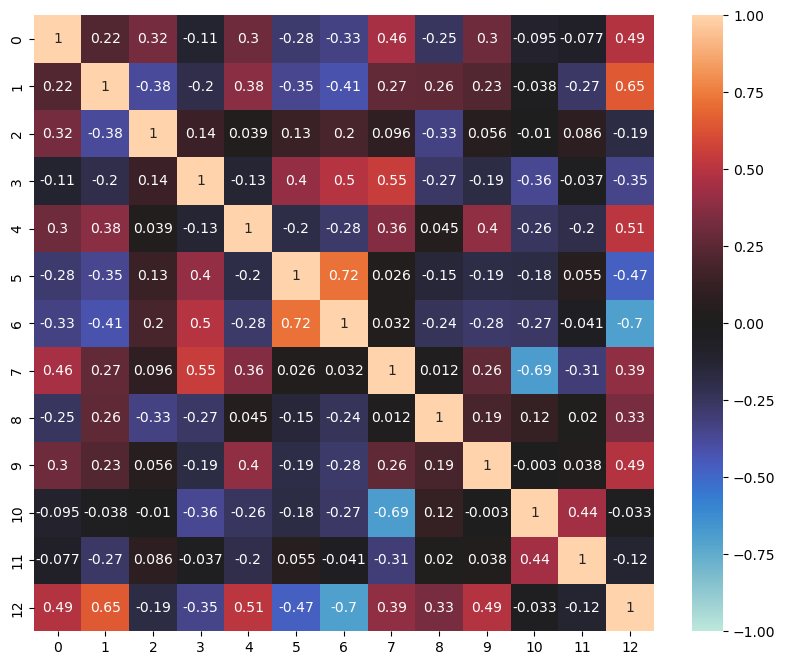

In [3]:
import seaborn as sns
#打印协方差矩阵，初步观察特征间关联度
print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[10,8])
df = pd.DataFrame(df_wine)
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

In [4]:
#计算PCA中的矩阵S
n=X.shape[0]
m=X.mean(0)
S=np.zeros((X.shape[1],X.shape[1]))
for i in range(0,n):
   # print((dataset[i]-m).shape)
    Si=np.outer((X[i]-m),(X[i]-m).T)
    # print(np.outer((dataset[i]-m),(dataset[i]-m).T).shape)
    S+=Si
#print(S)

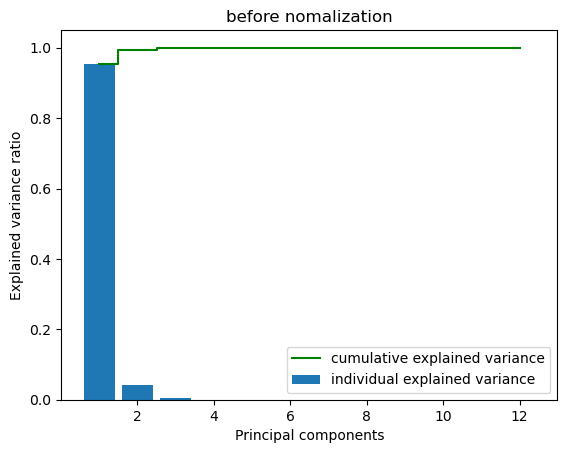

In [5]:
#计算个体方差贡献率，从而确定最终的维数
eigen_vals, eigen_vecs = np.linalg.eig(S)  # 计算特征值与特征向量
#print('\n Eigenvalues \n%s' % eigen_vals)

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)  # 每个元素表示对应主成分及之前的主成分所累计解释的方差比例。

plt.bar(range(1, 13), np.array(var_exp), align='center', label='individual explained variance')
plt.step(range(1, 13), cum_var_exp, where='mid', c='g',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')  # 方差贡献率
plt.xlabel('Principal components')  # 主成分数
plt.legend(loc='best')
plt.title('before nomalization')
plt.show()

(6497, 12)


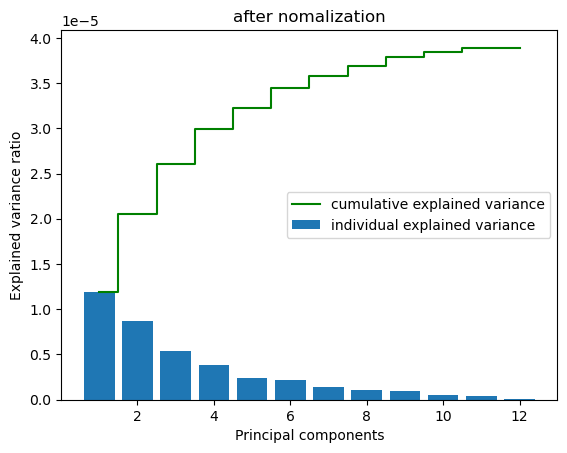

In [6]:
#数据归一化处理，并进行上述相同操作
df_wine = pd.DataFrame(df_wine)  # 将数据转换为DataFrame对象
df_minmax = df_wine.iloc[:, 0:-1].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
print(df_minmax.shape)
df_minmax = df_minmax.to_numpy()
Xn = np.array(df_minmax)
yn = y

#计算归一化后PCA中的矩阵S
nn=Xn.shape[0]
mn=Xn.mean(0)
Sn=np.zeros((Xn.shape[1],Xn.shape[1]))
for i in range(0,n):
   # print((dataset[i]-m).shape)
    Sni=np.outer((Xn[i]-mn),(Xn[i]-mn).T)
    # print(np.outer((dataset[i]-m),(dataset[i]-m).T).shape)
    Sn+=Sni

#计算归一化后的个体方差贡献率，从而确定最终的维数
eigen_valsn, eigen_vecsn = np.linalg.eig(Sn)  # 计算特征值与特征向量
#print('\n Eigenvalues \n%s' % eigen_vals)
totn = sum(eigen_valsn)
var_expn = [(i / tot) for i in sorted(eigen_valsn, reverse=True)]
cum_var_expn = np.cumsum(var_expn)  # 每个元素表示对应主成分及之前的主成分所累计解释的方差比例。

plt.bar(range(1, 13), np.array(var_expn), align='center', label='individual explained variance')
plt.step(range(1, 13), cum_var_expn, where='mid', c='g',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')  # 方差贡献率
plt.xlabel('Principal components')  # 主成分数
plt.title('after nomalization')
plt.legend(loc='best')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Matrix W:
 [[-7.40794747e-03  5.37151136e-03]
 [-1.18432245e-03  7.86983127e-04]
 [ 4.86867386e-04  2.47169465e-04]
 [ 4.10197243e-02 -1.86280097e-02]
 [-1.68197676e-04 -6.68445065e-05]
 [ 2.30481538e-01 -9.72618836e-01]
 [ 9.72166737e-01  2.31394621e-01]
 [ 1.77246490e-06 -1.27799964e-06]
 [-6.55520709e-04 -6.48013240e-04]
 [-7.04339125e-04 -3.46546062e-04]
 [-5.45180769e-03 -2.87899807e-03]
 [-5.32679832e-04 -9.15205691e-03]]


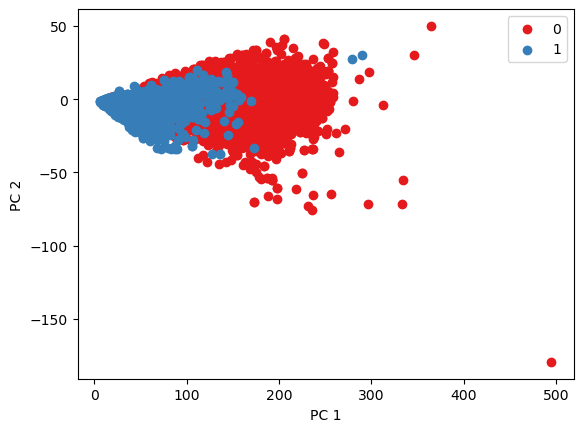

In [7]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)  # 按特征值降序排列特征对
'''
选取两个对应特征值最大的特征向量
'''
w = np.column_stack((eigen_pairs[0][1], eigen_pairs[1][1]))  # 得到12*2维的映射矩阵W
print('Matrix W:\n', w)
X_train_pca = X.dot(w)  # 将训练集数据转换到包含两个主成分的空间上
'''
压缩到二维的数据进行可视化展示
'''
X_train_pca = np.array(X_train_pca)
y = np.array(y, dtype=int)

colors = plt.cm.Set1(np.unique(y+1) / 10.)
# markers = ['s', 'x']
for i, c in zip(np.unique(y), colors):
    plt.scatter(X_train_pca[y == i, 0], X_train_pca[y == i, 1], c=c, label=i)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Matrix W:
 [[ 0.05414757  0.23400414]
 [ 0.01414188  0.47837713]
 [ 0.03342656 -0.16981236]
 [ 0.15999229 -0.18121461]
 [ 0.06154877  0.15916347]
 [ 0.08197973 -0.22330792]
 [ 0.26278259 -0.5715223 ]
 [ 0.18696788  0.09509336]
 [-0.1499638   0.30309274]
 [-0.02825428  0.19285043]
 [-0.78471846 -0.0668909 ]
 [-0.46536229 -0.33213189]]


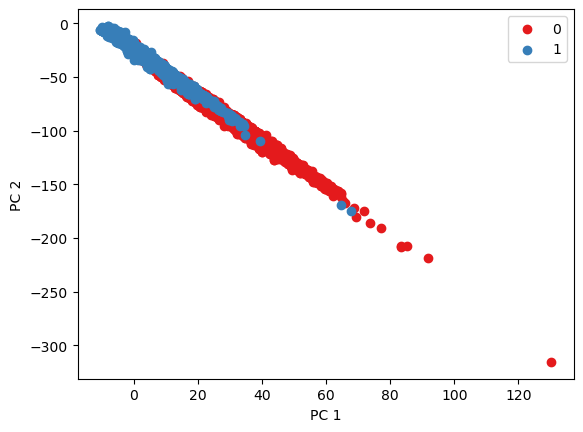

In [8]:
eigen_pairsn = [(np.abs(eigen_valsn[i]), eigen_vecsn[:, i]) for i in range(len(eigen_valsn))]
eigen_pairsn.sort(reverse=True)  # 按特征值降序排列特征对
'''
选取两个对应特征值最大的特征向量
'''
wn = np.column_stack((eigen_pairsn[0][1], eigen_pairsn[1][1]))  # 得到12*2维的映射矩阵W
print('Matrix W:\n', wn)
X_train_pcan = X.dot(wn)  # 将训练集数据转换到包含两个主成分的空间上
'''
压缩到二维的数据进行可视化展示
'''
X_train_pcan = np.array(X_train_pcan)
y = np.array(y, dtype=int)

colors = plt.cm.Set1(np.unique(y+1) / 10.)
# markers = ['s', 'x']
for i, c in zip(np.unique(y), colors):
    plt.scatter(X_train_pcan[y == i, 0], X_train_pcan[y == i, 1], c=c, label=i)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')
plt.show()

In [9]:
# LDA 
# 未经归一化
# 计算类内散布矩阵Sw
k = 12
Sw = np.zeros((k, k))
for label in np.unique(y):
    Si = np.zeros((k, k))
    Si = np.cov(X[y == label].T)
    Sw += Si
#print("类内散布矩阵：", Sw.shape[0], "*", Sw.shape[1])

# 计算跨类散布矩阵
np.set_printoptions(precision=4)
mean_vecs = []
for label in np.unique(y):
    mean_vecs.append(np.mean(X[y == label], axis=0))

#计算类间散布矩阵Sb
dataLabel = np.unique(y)
mean_all = np.mean(X, axis=0)
Sb = np.zeros((k, k))
for col_mv, label in zip(mean_vecs, dataLabel):
    n = X[y == label, :].shape[0]
    col_mv = col_mv.reshape(k, 1)  # 转化为列均值向量
    mean_all = mean_all.reshape(k, 1)
    Sb += n * (col_mv - mean_all).dot((col_mv - mean_all).T)
#print(Sb.shape)

# 求解S_w^-1S_B的广义特征值
# 计算广义特征值
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
print("特征值降序排列：")
for eigen_val in eigen_pairs:
    print(eigen_val[0])

特征值降序排列：
16558.70664238951
1.4968126194912536e-12
1.0024801716100673e-12
6.92685144774926e-13
6.92685144774926e-13
4.979629033303131e-13
4.979629033303131e-13
2.600744007263656e-13
1.7268112191854512e-13
1.323911240947325e-13
1.0414700251779175e-13
0.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


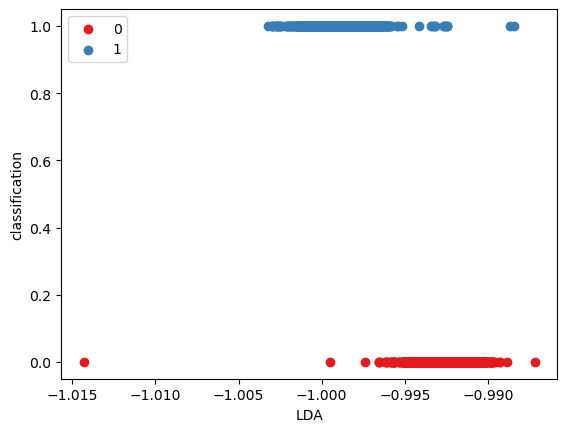

In [10]:
# 数据投影，变换矩阵
w = eigen_pairs[0][1][:, np.newaxis].real
for i in range(1, len(np.unique(y)) - 1):
    w = np.hstack((w, eigen_pairs[i][1][:, np.newaxis].real))
#print('w:',w.shape)

# 样本数据投影到低维空间
x_train_lda = X.dot(w)
#print(x_train_lda.shape)

colors = plt.cm.Set1(np.unique(y+1) / 10.)
# markers = ['s', 'x']

for i, c in zip(np.unique(y), colors):
    if i==0:
        plt.scatter(x_train_lda[y == i],np.zeros((np.sum([y==i]),1)), c=c, label=i)
        i+=1
    else:
        plt.scatter(x_train_lda[y == i], np.ones((np.sum([y == i]), 1)), c=c, label=i)
plt.xlabel('LDA')
plt.ylabel('classification')
plt.legend(loc='best')
plt.show()

In [11]:
#逻辑回归分类器
class LogisticRegressionClassifier:
    def __init__(self, max_iter, lr=0.0005):
        self.max_iter = max_iter  # 最大迭代次数
        self.lr = lr  # 学习率

    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X))  # 这里必须用np.exp，python库自带的exp无法对矩阵中的元素进行计算

    def softmax(self, x):
        # 计算每行的最大值
        row_max = np.max(x)
        # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
        x = x - row_max
        # 计算e的指数次幂
        x_exp = np.exp(x)
        x_sum = np.sum(x_exp)
        s = x_exp / x_sum
        return s

    def fit(self, X, y,X_test,y_test,batchsize):
        data_mat = X
        self.weights = np.zeros((len(data_mat[0]), C), dtype=np.float32)
        acclist = []
        errorlist = []
        errorloss = []
        for step_ in range(self.max_iter):
            count = 0
            err = 0
            totalErr = 0
            acc = []
            for i in range(data_mat.shape[0]):
                count+=1
                # pre = self.sigmoid(np.dot(data_mat[i], self.weights))
                t = np.dot(data_mat[i], self.weights)
                pre = self.softmax(t)
                # (1,3) = (1,4) x (4,3)
                obj = np.eye(C)[int(y[i])]  # 这里是将标签值，变成独热向量, 如[1] 变成 [0 1 0]
                err += pre - obj
                totalErr += pre - obj
                if count%batchsize==0 :
                    #计算每一个batch的gredient
                    #mean_err = err*(1/count)
                    self.weights -= self.lr * np.transpose([data_mat[i]]) * err
                    errorloss.append(err.sum())
                    # 对count清0
                    count = 0
                    err = 0
                score = self.score(X_test, y_test)
                acc.append(score)

            print("epoch[{}/{}] : accuracy {}".format(step_+1, max_iter, self.score(X_test, y_test)))
            # print("distribution\t", pre)
            totalMeanErr = totalErr/data_mat.shape[0]
            errorlist.append(totalMeanErr)
            MeanAcc = np.mean(np.array(acc))
            acclist.append(MeanAcc)
        # loss = np.mean(np.array(loss))

        return acclist,errorlist

    def score(self, X, y):
        right = 0
        for i in range(len(X)):
            pre = np.dot(X[i], self.weights)
            # (1,3) = (1,4) x (4,3)
            pre2 = np.argmax(pre)  # 找到(1,3)这个向量中值最大对应的索引，也就是预测的类别
            if pre2 == y[i]:  # 索引跟真实值一样，说明预测正确
                right += 1
        return right / X.shape[0];

In [12]:
#逻辑回归的数据处理
tempt = np.ones((X.shape[0], 1))
XX = np.concatenate((tempt, X), axis=1)
XX_pca = np.concatenate((tempt,X_train_pca),axis = 1)
XX_lda = np.concatenate((tempt,x_train_lda),axis = 1)
XX_train_pca, XX_test_pca, yy_train_pca, yy_test_pca = XX_pca[:6000, :], XX_pca[6000:, :], y[:6000], y[6000:]
XX_train_lda, XX_test_lda, yy_train_lda, yy_test_lda = XX_lda[:6000, :], XX_lda[6000:, :], y[:6000], y[6000:]
print('XX_train_pca:',XX_train_pca.shape)
print('yy_train_pca:',yy_train_pca.shape)
print('XX_train_lda:',XX_train_lda.shape)
print('yy_train_lda:',yy_train_lda.shape)

# XX, y = create_data()
#np.random.shuffle(XX,y)
#random_state = np.random.RandomState(42)  # 设置随机种子
#indices = np.arange(len(XX))  # 创建索引数组
#random_state.shuffle(indices)  # 对索引数组进行打乱操作
#XX = XX[indices]  # 根据打乱后的索引重新排序XX
#y = y[indices]  # 根据打乱后的索引重新排序y

X_train, X_test, y_train, y_test = XX[:6000, :], XX[6000:, :], y[:6000], y[6000:]
print(X_train.shape)
print(X_test.shape)

XX_train_pca: (6000, 3)
yy_train_pca: (6000,)
XX_train_lda: (6000, 2)
yy_train_lda: (6000,)
(6000, 13)
(497, 13)


In [13]:
max_iter = 20
lrc = LogisticRegressionClassifier(max_iter)

epoch[1/20] : accuracy 0.8772635814889336
epoch[2/20] : accuracy 0.8732394366197183
epoch[3/20] : accuracy 0.8913480885311871
epoch[4/20] : accuracy 0.8873239436619719
epoch[5/20] : accuracy 0.8209255533199196
epoch[6/20] : accuracy 0.8571428571428571
epoch[7/20] : accuracy 0.8551307847082495
epoch[8/20] : accuracy 0.869215291750503
epoch[9/20] : accuracy 0.8893360160965795
epoch[10/20] : accuracy 0.8752515090543259
epoch[11/20] : accuracy 0.8832997987927566
epoch[12/20] : accuracy 0.7665995975855131
epoch[13/20] : accuracy 0.7867203219315896
epoch[14/20] : accuracy 0.8611670020120724
epoch[15/20] : accuracy 0.8772635814889336
epoch[16/20] : accuracy 0.8832997987927566
epoch[17/20] : accuracy 0.8913480885311871
epoch[18/20] : accuracy 0.8832997987927566
epoch[19/20] : accuracy 0.8672032193158954
epoch[20/20] : accuracy 0.8651911468812877
epoch[1/20] : accuracy 0.7706237424547284
epoch[2/20] : accuracy 0.7706237424547284
epoch[3/20] : accuracy 0.7766599597585513
epoch[4/20] : accuracy 0

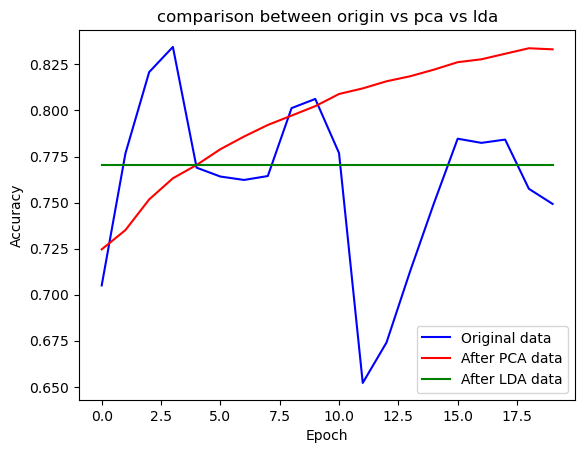

In [14]:
plt.figure()

# 绘制原始数据的折线图
acclist, errorlist = lrc.fit(X_train, y_train, X_test, y_test, 16)
plt.plot(range(max_iter), acclist, label='Original data', color='blue')

# 绘制经过PCA处理后的数据的折线图
acclist, errorlist = lrc.fit(XX_train_pca, yy_train_pca, XX_test_pca, yy_test_pca, 2)
plt.plot(range(max_iter), acclist, label='After PCA data', color='red')

# 绘制经过LDA处理后的数据的折线图
acclist, errorlist = lrc.fit(XX_train_lda, yy_train_lda, XX_test_lda, yy_test_lda, 4)
plt.plot(range(max_iter), acclist, label='After LDA data', color='green')

# 设置图像标题和轴标签
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# 添加图例
plt.legend(loc='lower right')
plt.title('comparison between origin vs pca vs lda')
# 显示图像
plt.show()


epoch[1/20] : accuracy 0.8772635814889336
epoch[2/20] : accuracy 0.8732394366197183
epoch[3/20] : accuracy 0.8913480885311871
epoch[4/20] : accuracy 0.8873239436619719
epoch[5/20] : accuracy 0.8209255533199196
epoch[6/20] : accuracy 0.8571428571428571
epoch[7/20] : accuracy 0.8551307847082495
epoch[8/20] : accuracy 0.869215291750503
epoch[9/20] : accuracy 0.8893360160965795
epoch[10/20] : accuracy 0.8752515090543259
epoch[11/20] : accuracy 0.8832997987927566
epoch[12/20] : accuracy 0.7665995975855131
epoch[13/20] : accuracy 0.7867203219315896
epoch[14/20] : accuracy 0.8611670020120724
epoch[15/20] : accuracy 0.8772635814889336
epoch[16/20] : accuracy 0.8832997987927566
epoch[17/20] : accuracy 0.8913480885311871
epoch[18/20] : accuracy 0.8832997987927566
epoch[19/20] : accuracy 0.8672032193158954
epoch[20/20] : accuracy 0.8651911468812877


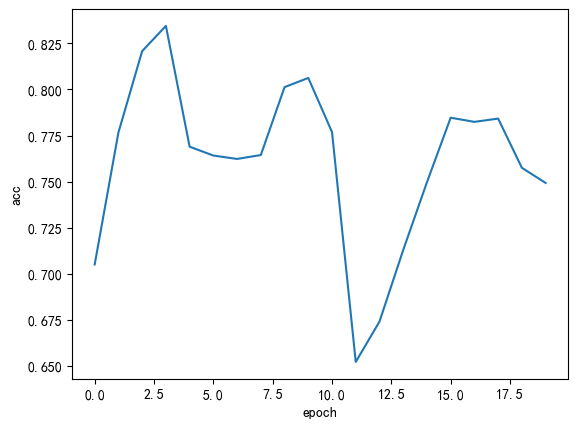

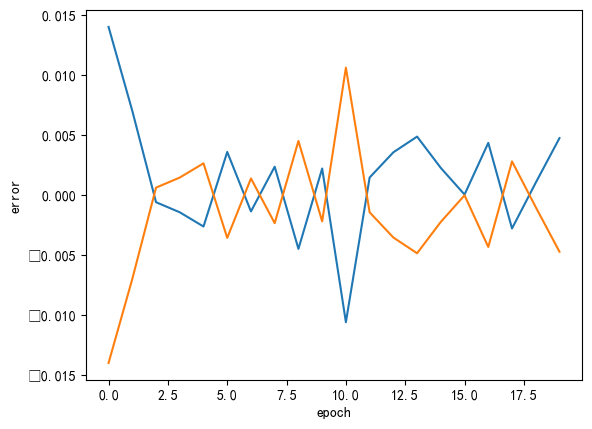

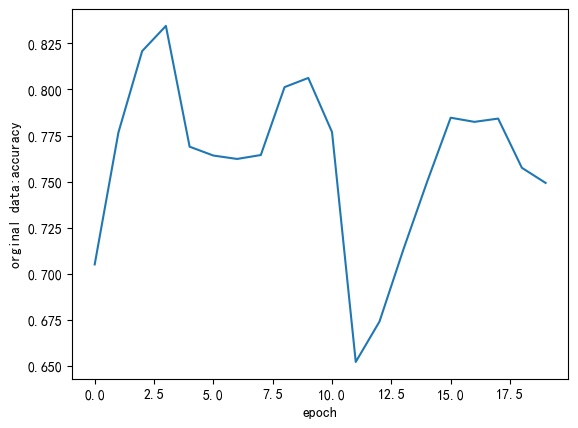

In [21]:
max_iter = 20
lrc = LogisticRegressionClassifier(max_iter)

#orginal data
acclist,errorlist = lrc.fit(X_train, y_train,X_test,y_test, 16)
plt.plot(range(max_iter), acclist)
plt.ylabel('orginal data:accuracy')
plt.xlabel('epoch')
plt.show()

epoch[1/20] : accuracy 0.7706237424547284
epoch[2/20] : accuracy 0.7706237424547284
epoch[3/20] : accuracy 0.7766599597585513
epoch[4/20] : accuracy 0.7887323943661971
epoch[5/20] : accuracy 0.7947686116700201
epoch[6/20] : accuracy 0.7987927565392354
epoch[7/20] : accuracy 0.8128772635814889
epoch[8/20] : accuracy 0.8229376257545271
epoch[9/20] : accuracy 0.9074446680080482
epoch[10/20] : accuracy 0.9356136820925554
epoch[11/20] : accuracy 0.937625754527163
epoch[12/20] : accuracy 0.93158953722334
epoch[13/20] : accuracy 0.9295774647887324
epoch[14/20] : accuracy 0.9295774647887324
epoch[15/20] : accuracy 0.93158953722334
epoch[16/20] : accuracy 0.9336016096579477
epoch[17/20] : accuracy 0.93158953722334
epoch[18/20] : accuracy 0.9255533199195171
epoch[19/20] : accuracy 0.9255533199195171
epoch[20/20] : accuracy 0.9255533199195171


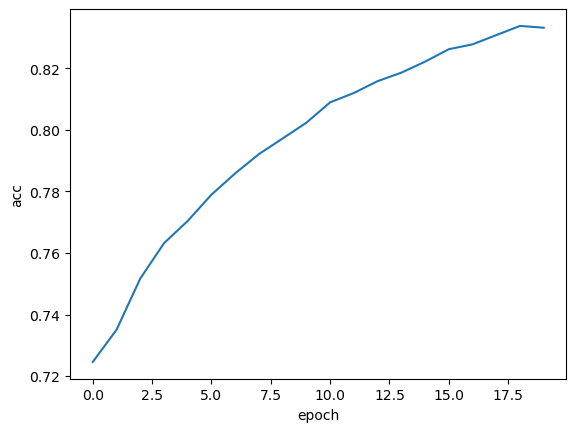

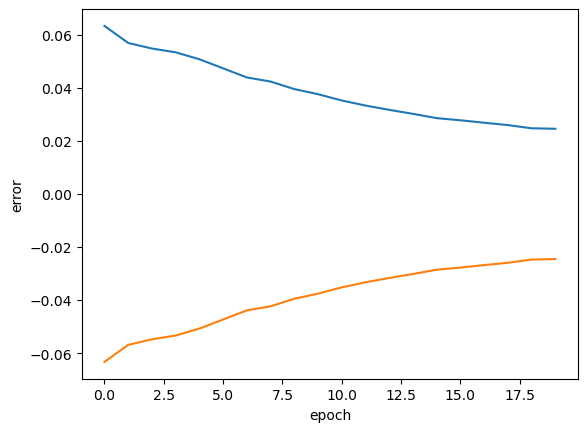

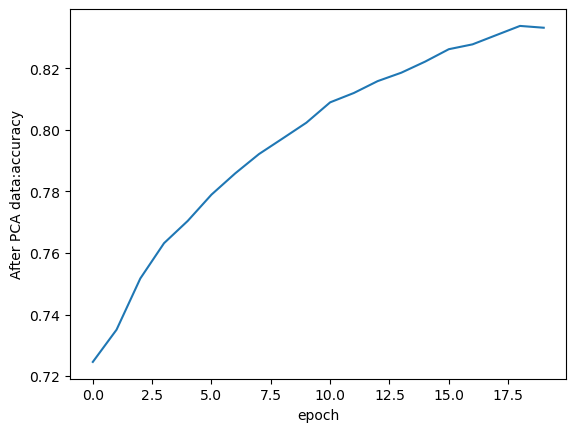

In [14]:
#PCA
acclist,errorlist = lrc.fit(XX_train_pca, yy_train_pca,XX_test_pca,yy_test_pca, 2)
plt.plot(range(max_iter), acclist)
plt.ylabel('After PCA data:accuracy')
plt.xlabel('epoch')
plt.show()

epoch[1/20] : accuracy 0.7706237424547284
epoch[2/20] : accuracy 0.7706237424547284
epoch[3/20] : accuracy 0.7706237424547284
epoch[4/20] : accuracy 0.7706237424547284
epoch[5/20] : accuracy 0.7706237424547284
epoch[6/20] : accuracy 0.7706237424547284
epoch[7/20] : accuracy 0.7706237424547284
epoch[8/20] : accuracy 0.7706237424547284
epoch[9/20] : accuracy 0.7706237424547284
epoch[10/20] : accuracy 0.7706237424547284
epoch[11/20] : accuracy 0.7706237424547284
epoch[12/20] : accuracy 0.7706237424547284
epoch[13/20] : accuracy 0.7706237424547284
epoch[14/20] : accuracy 0.7706237424547284
epoch[15/20] : accuracy 0.7706237424547284
epoch[16/20] : accuracy 0.7706237424547284
epoch[17/20] : accuracy 0.7706237424547284
epoch[18/20] : accuracy 0.7706237424547284
epoch[19/20] : accuracy 0.7706237424547284
epoch[20/20] : accuracy 0.7706237424547284


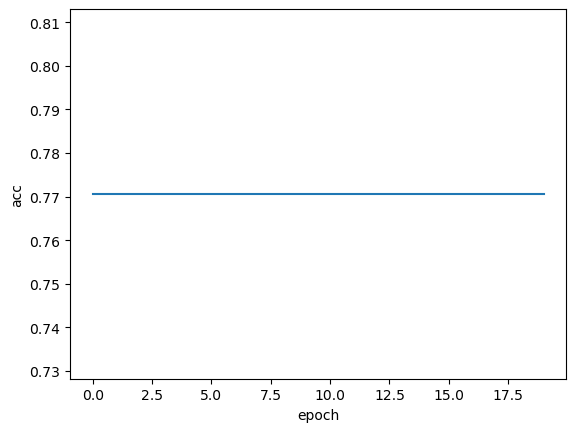

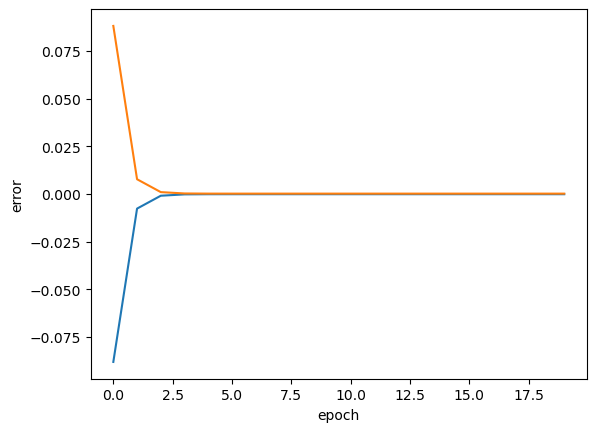

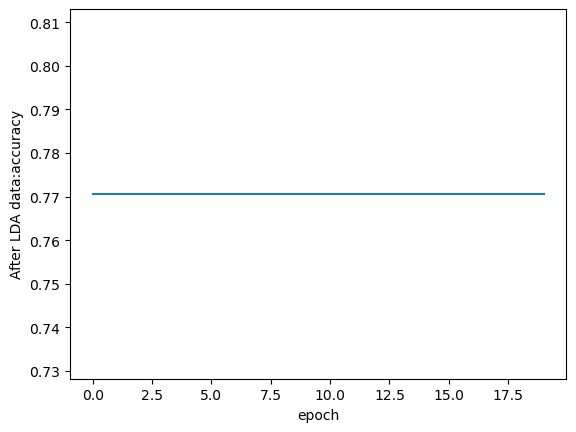

In [16]:

# LDA

acclist,errorlist = lrc.fit(XX_train_lda, yy_train_lda,XX_test_lda,yy_test_lda, 4)
plt.plot(range(max_iter), acclist)
plt.ylabel('After LDA data:accuracy')
plt.xlabel('epoch')
plt.show()

类内散布矩阵： 2 * 2
(2, 2)
特征值降序排列：
3546.7571819997747
1.0282325713651141e-14


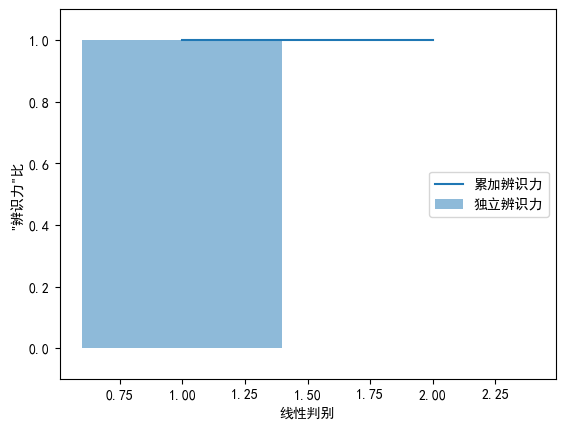

In [18]:
#pca+lda
# 计算类内散布矩阵
k = 2
Sw = np.zeros((k, k))
for label in np.unique(y):
    Si = np.zeros((k, k))
    Si = np.cov(X_train_pca[y == label].T)
    Sw += Si
print("类内散布矩阵：", Sw.shape[0], "*", Sw.shape[1])
# 类间散布矩阵


# 计算跨类散布矩阵
np.set_printoptions(precision=4)
mean_vecs = []
for label in np.unique(y):
    mean_vecs.append(np.mean(X_train_pca[y == label], axis=0))
# print(mean_vecs)
dataLabel = np.unique(y)
# print(dataLabel)
mean_all = np.mean(X_train_pca, axis=0)
# print(mean_all.shape)
Sb = np.zeros((k, k))
for col_mv, label in zip(mean_vecs, dataLabel):
    n = X_train_pca[y == label, :].shape[0]
    col_mv = col_mv.reshape(k, 1)  # 转化为列均值向量
    mean_all = mean_all.reshape(k, 1)
    Sb += n * (col_mv - mean_all).dot((col_mv - mean_all).T)

print(Sb.shape)
# 求解S_w^-1S_B的广义特征值
# 计算广义特征值
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
print("特征值降序排列：")
for eigen_val in eigen_pairs:
    print(eigen_val[0])
# 线性判别捕捉，计算辨识力
tot = sum(eigen_vals.real)
discr = []
# discr=[(i/tot) for i in sorted(eigen_vals.real,reverse=True)]
for i in sorted(eigen_vals.real, reverse=True):
    discr.append(i / tot)
# print(discr)
cum_discr = np.cumsum(discr)  # 计算累加方差
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
plt.bar(range(1, 3), discr, alpha=0.5, align='center', label='独立辨识力')
plt.step(range(1, 3), cum_discr, where='mid', label='累加辨识力')
plt.ylabel('"辨识力"比')
plt.xlabel('线性判别')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


w: (2, 1)
(6497, 1)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


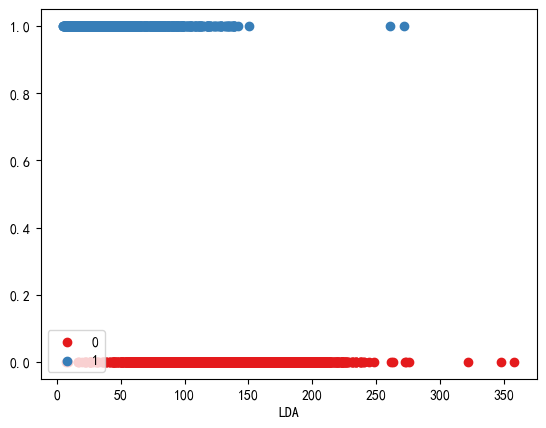

In [19]:
w = eigen_pairs[0][1][:, np.newaxis].real
for i in range(1, len(np.unique(y)) - 1):
    w = np.hstack((w, eigen_pairs[i][1][:, np.newaxis].real))
print('w:',w.shape)
#print(w.shape)

# 样本数据投影到低维空间
x_train_pcalda = X_train_pca.dot(w)
#print(X.shape)
#print(w.shape)
#print(x_train_lda.shape)

colors = plt.cm.Set1(np.unique(y+1) / 10.)
# markers = ['s', 'x']
print(x_train_pcalda.shape)
i = 0
for i, c in zip(np.unique(y), colors):
    if i==0:
        plt.scatter(x_train_pcalda[y == i],np.zeros((np.sum([y==i]),1)), c=c, label=i)
        i+=1
    else:
        plt.scatter(x_train_pcalda[y == i], np.ones((np.sum([y == i]), 1)), c=c, label=i)
plt.xlabel('LDA')
#plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

In [13]:
#以下为PCA+LDA运行结果
'''
XX_pcalda = np.concatenate((tempt,x_train_pcalda),axis = 1)
XX_train_pcalda, XX_test_pcalda, yy_train_pcalda, yy_test_pcalda = XX_pcalda[:6000, :], XX_pcalda[6000:, :], y[:6000], y[6000:]
acclist,errorlist = lrc.fit(XX_train_pcalda,yy_train_pcalda,XX_test_pcalda,yy_test_pcalda,4)
plt.plot(range(max_iter), acclist)
plt.ylabel('After PCA&LDA data:accuracy')
plt.xlabel('epoch')
plt.show()
'''

NameError: name 'x_train_pcalda' is not defined